In [28]:
# Import relevant libraries for the project
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
plt.style.use('ggplot')


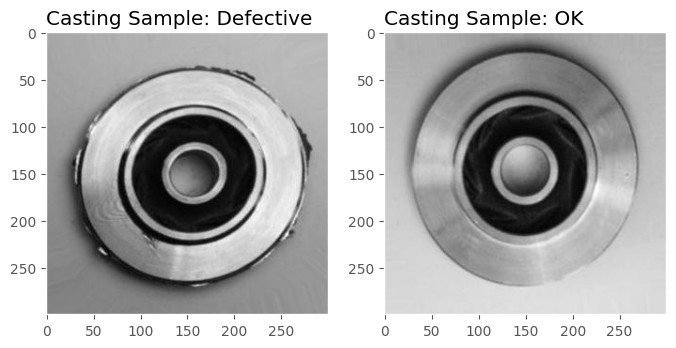

In [33]:
import os
import matplotlib.pyplot as plt

# Specify the directory paths for defective and non-defective casting images
dir_train_def = '/content/casting_data/casting_data/train/def_front'
dir_train_ok = '/content/casting_data/casting_data/train/ok_front'

# Plot samples of defective and non-defective casting
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sample_def = plt.imread(os.path.join(dir_train_def, os.listdir(dir_train_def)[0]))
sample_ok = plt.imread(os.path.join(dir_train_ok, os.listdir(dir_train_ok)[0]))
axes[0].imshow(sample_def)
axes[1].imshow(sample_ok)
axes[0].set_title('Casting Sample: Defective', loc='left')
axes[1].set_title('Casting Sample: OK', loc='left')
axes[0].grid(False)
axes[1].grid(False)
plt.show()


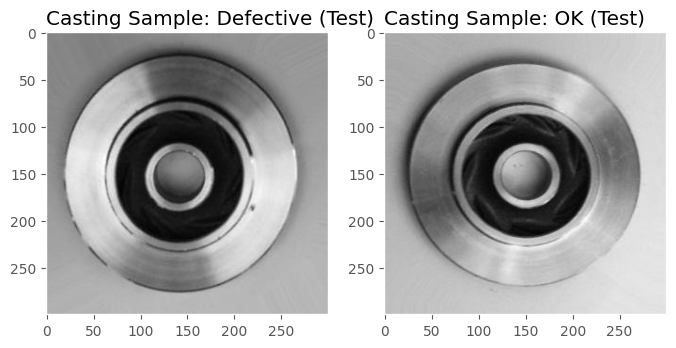

In [34]:
dir_test_def = '/content/casting_data/casting_data/test/def_front'
dir_test_ok = '/content/casting_data/casting_data/test/ok_front'
# Plot samples of defective and non-defective casting from the test dataset
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sample_def_test = plt.imread(os.path.join(dir_test_def, os.listdir(dir_test_def)[0]))
sample_ok_test = plt.imread(os.path.join(dir_test_ok, os.listdir(dir_test_ok)[0]))
axes[0].imshow(sample_def_test)
axes[1].imshow(sample_ok_test)
axes[0].set_title('Casting Sample: Defective (Test)', loc='left')
axes[1].set_title('Casting Sample: OK (Test)', loc='left')
axes[0].grid(False)
axes[1].grid(False)
plt.show()

In [35]:
# Create dataframe of class distribution
n_train = [len(os.listdir(dir_train_def)), len(os.listdir(dir_train_ok))]
n_test = [len(os.listdir(dir_test_def)), len(os.listdir(dir_test_ok))]
dist_df = pd.DataFrame(
    data=[n_train, n_test],
    columns=['Defective', 'OK'],
    index=['Train', 'Test'])


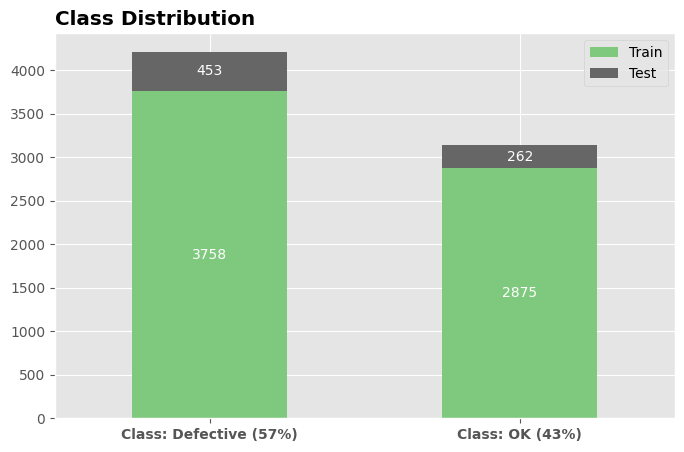

In [36]:
# Visualize class distribution
ax = dist_df.T.plot(kind='bar', stacked=True, rot=0, figsize=(8,5), colormap='Accent')
ax.set_title('Class Distribution', loc='left', weight='bold')
for bar in ax.patches:
    ax.text(bar.get_x()+bar.get_width()-0.25,
            bar.get_y()+bar.get_height()/2,
            int(bar.get_height()),
            ha='center', va='center', color='white')
pct_def = 100*dist_df['Defective'].values.sum()/dist_df.values.sum()
pct_ok = 100-pct_def
ax.set_xticklabels([f'Class: Defective ({pct_def:.0f}%)',
                    f'Class: OK ({pct_ok:.0f}%)'], weight='bold')
plt.show()

Data Preprocessing

In [39]:
# Define instances of ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_gen = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size, batch_size, rand_seed = (300, 300), 64, 0
arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'classes': {'ok_front': 0,
                         'def_front': 1},
             'class_mode': 'binary',
             'batch_size': batch_size,
             'seed': rand_seed}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'classes': {'ok_front': 0,
                        'def_front': 1},
            'class_mode': 'binary',
            'batch_size': batch_size,
            'seed': rand_seed,
            'shuffle': False}

# Generate data by iterating through directories
train_set = train_gen.flow_from_directory(
    directory='/content/real-life-industrial-dataset-of-casting-product/train',
    subset='training', **arg_train)
valid_set = train_gen.flow_from_directory(
    directory='/content/real-life-industrial-dataset-of-casting-product/train',
    subset='validation', **arg_train)
test_set = test_gen.flow_from_directory(
    directory='/content/real-life-industrial-dataset-of-casting-product/test',
    **arg_test)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


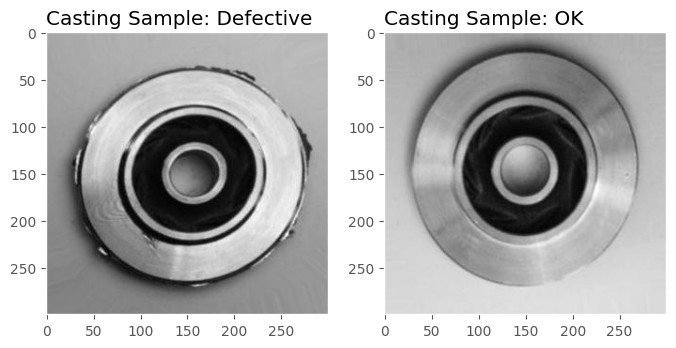

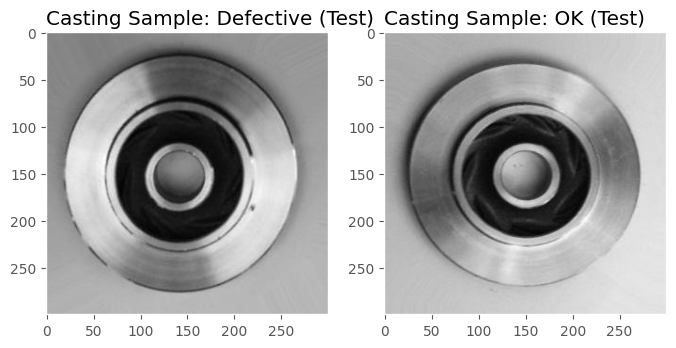

Found 5307 images belonging to 2 classes.
Found 1326 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [40]:
# Import relevant libraries for the project
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plt.style.use('ggplot')

# Specify the directory paths for defective and non-defective casting images
dir_train_def = '/content/casting_data/casting_data/train/def_front'
dir_train_ok = '/content/casting_data/casting_data/train/ok_front'

# Plot samples of defective and non-defective casting
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sample_def = plt.imread(os.path.join(dir_train_def, os.listdir(dir_train_def)[0]))
sample_ok = plt.imread(os.path.join(dir_train_ok, os.listdir(dir_train_ok)[0]))
axes[0].imshow(sample_def)
axes[1].imshow(sample_ok)
axes[0].set_title('Casting Sample: Defective', loc='left')
axes[1].set_title('Casting Sample: OK', loc='left')
axes[0].grid(False)
axes[1].grid(False)
plt.show()

dir_test_def = '/content/casting_data/casting_data/test/def_front'
dir_test_ok = '/content/casting_data/casting_data/test/ok_front'

# Plot samples of defective and non-defective casting from the test dataset
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sample_def_test = plt.imread(os.path.join(dir_test_def, os.listdir(dir_test_def)[0]))
sample_ok_test = plt.imread(os.path.join(dir_test_ok, os.listdir(dir_test_ok)[0]))
axes[0].imshow(sample_def_test)
axes[1].imshow(sample_ok_test)
axes[0].set_title('Casting Sample: Defective (Test)', loc='left')
axes[1].set_title('Casting Sample: OK (Test)', loc='left')
axes[0].grid(False)
axes[1].grid(False)
plt.show()

# Define instances of ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_gen = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size, batch_size, rand_seed = (300, 300), 64, 0
arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode': 'binary',
             'batch_size': batch_size,
             'seed': rand_seed}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode': 'binary',
            'batch_size': batch_size,
            'seed': rand_seed,
            'shuffle': False}

# Generate data by iterating through directories
train_set = train_gen.flow_from_directory(
    directory='/content/casting_data/casting_data/train',
    subset='training', **arg_train)
valid_set = train_gen.flow_from_directory(
    directory='/content/casting_data/casting_data/train',
    subset='validation', **arg_train)
test_set = test_gen.flow_from_directory(
    directory='/content/casting_data/casting_data/test',
    **arg_test)


Model Building

In [41]:
# Define CNN model architecture
cnn_model = Sequential([
    # First block
    Conv2D(32, 3, activation='relu', padding='same', strides=2,
           input_shape=img_size+(1,)),
    MaxPooling2D(pool_size=2, strides=2),
    # Second block
    Conv2D(64, 3, activation='relu', padding='same', strides=2),
    MaxPooling2D(pool_size=2, strides=2),
    # Flatenning
    Flatten(),
    # Fully connected layers
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')        # Only 1 output
])

# Compile model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Default lr
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Display summary of model architecture
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23104)             0         
                                                                 
 dense (Dense)               (None, 128)               2

Model Training and Evaluation

In [51]:
%%time

# Fit model using train set and validation set
n_epochs =20
cnn_model.fit(
    train_set,
    validation_data=valid_set,
    epochs=n_epochs,
    callbacks=ModelCheckpoint(
        'CNN_Casting_Inspection.hdf5',
        save_best_only=True,
        monitor='val_loss'),
    verbose=1)

Epoch 1/20
83/83 [==============================] - 136s 2s/step - loss: 0.4112 - accuracy: 0.8065 - val_loss: 0.3020 - val_accuracy: 0.9027
Epoch 2/20
83/83 [==============================] - 140s 2s/step - loss: 0.2967 - accuracy: 0.8851 - val_loss: 0.2069 - val_accuracy: 0.9329
Epoch 3/20
83/83 [==============================] - 142s 2s/step - loss: 0.1933 - accuracy: 0.9329 - val_loss: 0.1599 - val_accuracy: 0.9465
Epoch 4/20
83/83 [==============================] - 131s 2s/step - loss: 0.1399 - accuracy: 0.9553 - val_loss: 0.1146 - val_accuracy: 0.9600
Epoch 5/20
83/83 [==============================] - 140s 2s/step - loss: 0.1073 - accuracy: 0.9672 - val_loss: 0.1067 - val_accuracy: 0.9600
Epoch 6/20
83/83 [==============================] - 129s 2s/step - loss: 0.0835 - accuracy: 0.9757 - val_loss: 0.0594 - val_accuracy: 0.9842
Epoch 7/20
83/83 [==============================] - 138s 2s/step - loss: 0.0506 - accuracy: 0.9876 - val_loss: 0.0575 - val_accuracy: 0.9842
Epoch 8/20
83

run to 20 epoch the curve will shown

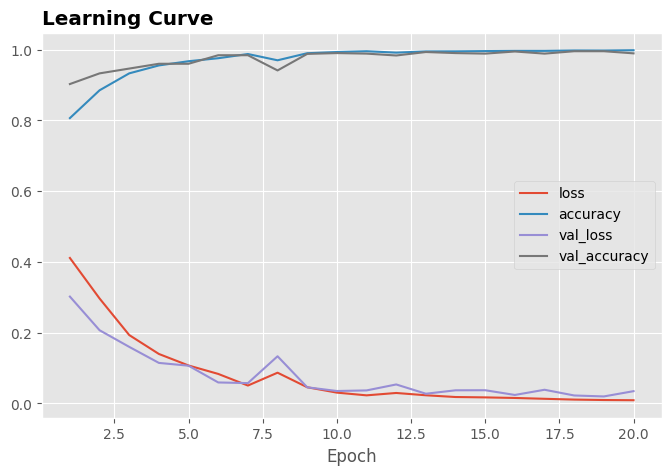

In [52]:
# Plot learning curve from model history
histo_dict = cnn_model.history.history
histo_df = pd.DataFrame(histo_dict, index=range(1,n_epochs+1))
fig, ax = plt.subplots(figsize=(8,5))
for m in histo_df.columns:
    ax.plot(histo_df.index, m, data=histo_df)
ax.set_xlabel('Epoch')
ax.set_title('Learning Curve', loc='left', weight='bold')
ax.legend()
plt.show()


Using Model to Classify New Images

In [53]:
# Load saved model
best_model = load_model('./CNN_Casting_Inspection.hdf5')

# Make predictions on images in the test set
y_pred_prob = best_model.predict(test_set, verbose=1)
y_pred = (y_pred_prob >= 0.5).reshape(-1,)
y_true = test_set.classes[test_set.index_array]

12/12 [==============================] - 10s 745ms/step


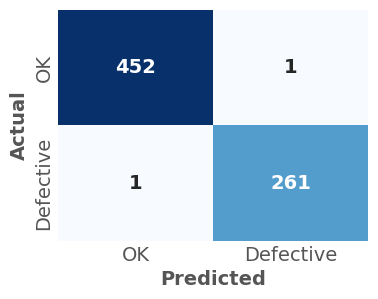

In [54]:
# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.heatmap(confusion_matrix(y_true,y_pred), annot=True,
                 annot_kws={'size':14, 'weight':'bold'},
                 fmt='d', cbar=False, cmap='Blues')
ax.set_xticklabels(['OK', 'Defective'])
ax.set_yticklabels(['OK', 'Defective'], va='center')
plt.tick_params(axis='both', labelsize=14, length=0)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [55]:
print(classification_report(y_true, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9978    0.9978    0.9978       453
           1     0.9962    0.9962    0.9962       262

    accuracy                         0.9972       715
   macro avg     0.9970    0.9970    0.9970       715
weighted avg     0.9972    0.9972    0.9972       715



1/1 [==============================] - 0s 140ms/step


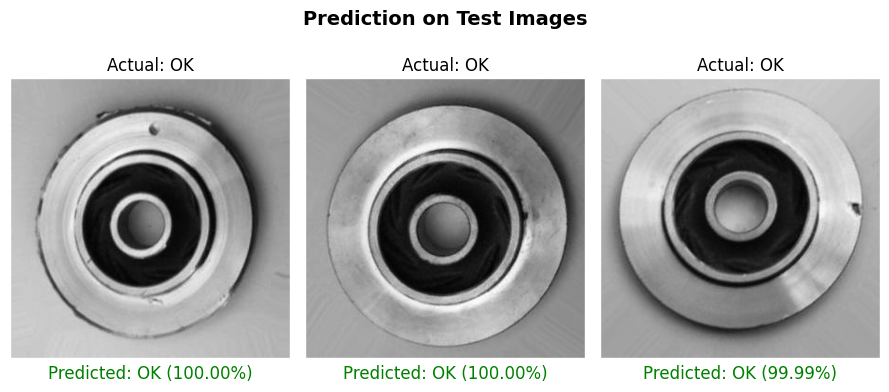

In [56]:
class_map = {0: 'OK', 1: 'Defective'}
images, labels = next(iter(test_set))
images = images.reshape(batch_size,*img_size)

fig, axes = plt.subplots(1, 3, figsize=(9, 4))
fig.suptitle('Prediction on Test Images', y=0.98, weight='bold', size=14)
for ax, img, label in zip(axes.flat, images, labels):
    ax.imshow(img, cmap='gray')
    [[pred_prob]] = best_model.predict(img.reshape(1, *img_size, -1))
    pred_label = class_map[int(pred_prob>=0.5)]
    true_label = class_map[label]
    prob_class = 100*pred_prob if pred_label=='Defective' else 100*(1-pred_prob)
    ax.set_title(f'Actual: {true_label}', size=12)
    ax.set_xlabel(f'Predicted: {pred_label} ({prob_class:.2f}%)',
                  color='g' if pred_label==true_label else 'r')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 35ms/step


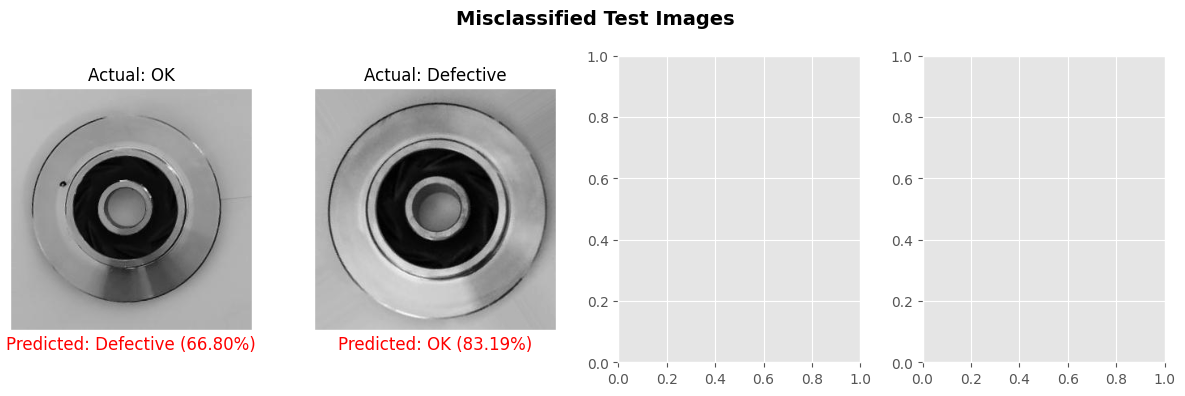

In [58]:
misclassified = np.nonzero(y_pred != y_true)[0]
batch_num = misclassified//batch_size
image_num = misclassified%batch_size

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Misclassified Test Images', y=0.98, weight='bold', size=14)
for ax, bnum, inum in zip(axes.flat, batch_num, image_num):
    images, labels = test_set[bnum]
    img = images[inum]
    ax.imshow(img.reshape(*img_size), cmap='gray')
    [[pred_prob]] = best_model.predict(img.reshape(1, *img_size, -1))
    pred_label = class_map[int(pred_prob>=0.5)]
    true_label = class_map[labels[inum]]
    prob_class = 100*pred_prob if pred_label=='Defective' else 100*(1-pred_prob)
    ax.set_title(f'Actual: {true_label}', size=12)
    ax.set_xlabel(f'Predicted: {pred_label} ({prob_class:.2f}%)',
                  color='g' if pred_label==true_label else 'r')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()